In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def f(a):
    # create 1000 equally spaced points between -10 and 10
    x = np.linspace(-10, 10, 1000)
    y = x**2 + a*x + 2  
    plt.plot(x, y)
    plt.tight_layout()
    return a

In [8]:
interact(f, a=10);

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), Output()), _dom_classes=('widget-…

	samples 888 lines 777 bands 3
+r ../data/ubc/G80223_20230513.bin


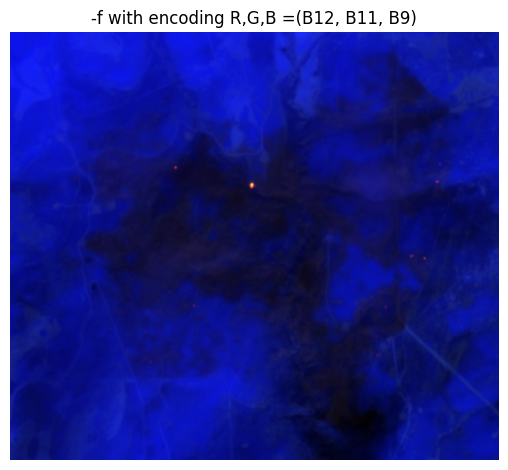

In [9]:
from misc import read_binary
from view import plot
samples, lines, bands, data = read_binary("../data/ubc/G80223_20230513.bin")
plot("../data/ubc/G80223_20230513.bin", False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


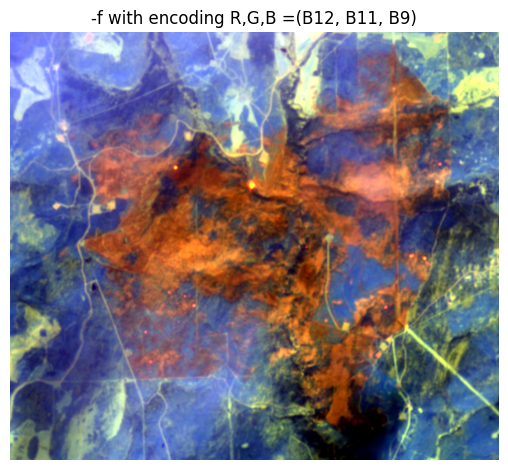

In [10]:
plot("../data/ubc/G80223_20230513.bin", True)

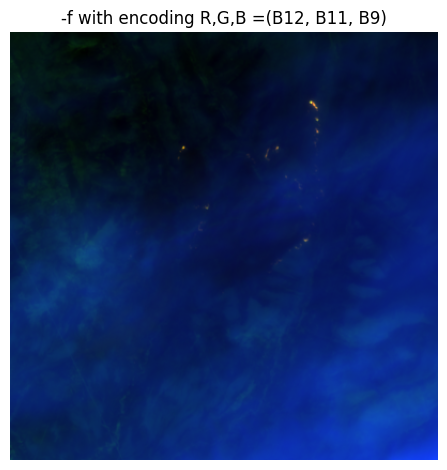

In [11]:
plot("../data/ubc/G90292_20230514.bin", False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


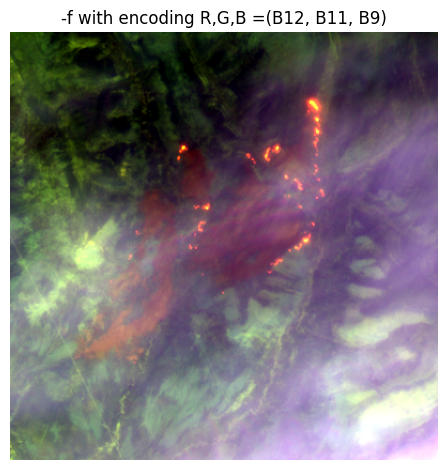

In [12]:
plot("../data/ubc/G90292_20230514.bin", True)


In [13]:
MIN_FIRE_SIZE_HA = .1
TOP_N = 10

import datetime
import zipfile
import shutil
import urllib
import json
from osgeo import ogr
t = datetime.datetime.now().strftime("%Y%m%d%H%M")  # timestamped backup

# save "fire polygon" shapefile
fn = 'prot_current_fire_polys.zip'
dl_path = 'https://pub.data.gov.bc.ca/datasets/cdfc2d7b-c046-4bf0-90ac-4897232619e1/' + fn
urllib.request.urlretrieve(dl_path, fn)
ofn = 'prot_current_fire_polys_' + t + '.zip'
shutil.copyfile(fn, ofn)
zipfile.ZipFile(fn).extractall()
print(ofn)

# save "fire point" shapefile
fn = 'prot_current_fire_points.zip'
dl_path = 'https://pub.data.gov.bc.ca/datasets/2790e3f7-6395-4230-8545-04efb5a18800/' + fn
urllib.request.urlretrieve(dl_path, fn)
ofn = 'prot_current_fire_points_' + t + '.zip'
shutil.copyfile(fn, ofn)
zipfile.ZipFile(fn).extractall()
print(ofn)

selected = []

# Open Shapefile
Shapefile = ogr.Open('prot_current_fire_points.shp') # print(Shapefile)
layer = Shapefile.GetLayer()
layerDefinition = layer.GetLayerDefn()
feature_count = layer.GetFeatureCount()
spatialRef = layer.GetSpatialRef()

def records(layer):
    for i in range(layer.GetFeatureCount()):
        feature = layer.GetFeature(i)
        yield json.loads(feature.ExportToJson())

features = records(layer)
feature_names, feature_ids = [], []
for f in features:
    for key in f.keys():
        if key == 'properties':
            fk = f[key]
            # print(fk)
            fire_size = float(fk['CURRENT_SZ'])

            if False:  # not out and larger than MIN_FIRE_SIZE_HA
                if fk['STATUS'].lower() != 'out' and fire_size >= MIN_FIRE_SIZE_HA:  # > biggest_size
                    selected.append([fk['CURRENT_SZ'], fk])  # selected fires
                    #print(fk)
            if False:
                if fk['STATUS'].lower() == 'out':
                    selected.append([fk['CURRENT_SZ'], fk])
            if False:  # fire of note
                if fk['STATUS'] ==  'Fire of Note':
                    selected.append([fk['CURRENT_SZ'], fk])

            if True:  # out of control
                if fk['STATUS'] == 'Out of Control':
                    selected.append([fk['CURRENT_SZ'], fk])

            if False:  # being held
                if fk['STATUS'] == 'Being Held':
                    selected.append([fk['CURRENT_SZ'], fk])

selected = list(selected)

# remove duplicates
selected = [json.loads(s) for s in list(set([json.dumps(s) for s in selected]))]

# sort by order of size, largest first
ix = [[selected[i][0], i] for i in range(len(selected))]
ix.sort(reverse=True)
#ix.sort(reverse=False)
#print("ix", ix)
selected = [selected[i[1]] for i in ix]

# select the top TOP_N by size
selected = selected[0: TOP_N]
for s in selected:
    print(s)


prot_current_fire_polys_202405250001.zip
prot_current_fire_points_202405250001.zip


Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_cu

[83759.0, {'FIRE_NUM': 'G90228', 'FIRE_YEAR': 2024, 'RSPNCE_TYP': 'Full', 'IGNITN_DT': '2024/05/05', 'FIREOUT_DT': None, 'STATUS': 'Out of Control', 'FIRE_CAUSE': 'Lightning', 'FIRE_CENTR': 4, 'ZONE': 9, 'FIRE_ID': 228, 'FIRE_TYPE': 'Fire', 'INCIDNT_NM': '2024 Holdover Nogah Creek', 'GEOGRAPHIC': 'Nogah Creek', 'LATITUDE': 58.794, 'LONGITUDE': -121.6269, 'CURRENT_SZ': 83759.0, 'FIRE_LINK': 'https://wildfiresituation.nrs.gov.bc.ca/incidents?fireYear=2024&incidentNumber=G90228', 'FIRE_NT': 'N', 'WS_FIRE_NT': 'N', 'FEATURE_CD': 0.0, 'OBJECTID': 747306}]
[37852.0, {'FIRE_NUM': 'G90289', 'FIRE_YEAR': 2024, 'RSPNCE_TYP': 'Full', 'IGNITN_DT': '2024/05/11', 'FIREOUT_DT': None, 'STATUS': 'Out of Control', 'FIRE_CAUSE': 'Lightning', 'FIRE_CENTR': 4, 'ZONE': 9, 'FIRE_ID': 289, 'FIRE_TYPE': 'Fire', 'INCIDNT_NM': '2024 Holdover G93291', 'GEOGRAPHIC': 'Gote Creek / Tsea River', 'LATITUDE': 59.6011, 'LONGITUDE': -121.8317, 'CURRENT_SZ': 37852.0, 'FIRE_LINK': 'https://wildfiresituation.nrs.gov.bc.ca/i

Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_current_fire_points.FEATURE_CD parsed incompletely to real 0.
Warning 1: Value 'JA70003000' of field prot_cu

In [14]:
# Look at the smoke locations from GeoBC flight?

<Axes: >

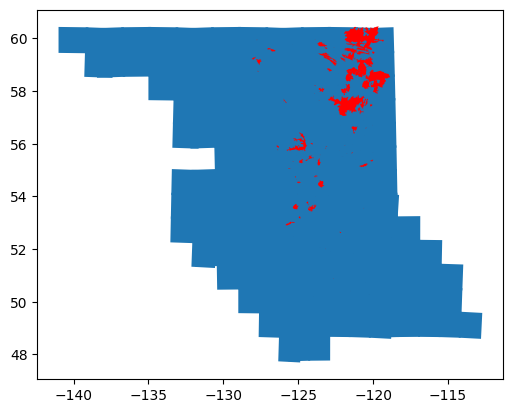

In [15]:
import geopandas as gpd
s2_df = gpd.read_file('sentinel2_bc_tiles_shp/Sentinel_BC_Tiles.shp')# .to_crs(4326) # WGS 84, lat/lon CRS
fire_df = gpd.read_file('prot_current_fire_polys.shp').to_crs(s2_df.crs)

ax1 = s2_df.plot()
fire_df.plot(ax=ax1, color="red")


In [16]:
# don't forget to plot image histograms! 

In [17]:
# find out which tiles intersect with a given polygon 

In [18]:

TARGET_FIRE_NUM = 'G90267'

fire_lookup = {f.FIRE_NUM: f for f in fire_df.iloc}  # index the shapefile records by fire number
p = fire_lookup[TARGET_FIRE_NUM]  # pull out the target fire
selected_gdf = gpd.GeoDataFrame([p], crs=s2_df.crs)  # turn the selected record into a geodataframe

# intersect this record with the other shapefile
intersection = gpd.sjoin(s2_df, selected_gdf, how='inner', predicate='intersects')

# sentinel2 frame ID in intersection
frame_ID = [intersection.iloc[i][1] for i in range(intersection.shape[0])]
print(frame_ID)


['10VDL', '10VEL']


In [19]:
# # first try mrap on one frame..

In [20]:
#a = os.system("python3 ~/GitHub/wps-research/py/sync_daterange_gid_zip.py 20240510 20240520 10VEL 10VDL")


In [21]:
import requests
url = 'https://catalogue.dataspace.copernicus.eu/resto/api/collections/Sentinel2/search.json?&startDate=2024-05-20&lon=-122.953&lat=58.8567'
resp = requests.get(url=url) 
data = resp.json()

In [22]:
print(data.keys())

dict_keys(['type', 'properties', 'features'])


In [23]:
for feature in data['features']:
    # print(feature.keys())
    # print(feature['properties'].keys())
    print(feature['properties']['title'], feature['properties']['services']['download']['url'])
    # print("")
    # print(feature)
    

S2B_MSIL1C_20240520T192909_N0510_R142_T10VDL_20240520T231115.SAFE https://catalogue.dataspace.copernicus.eu/download/c1a79405-e0ca-44bb-9716-c69dc3bb1cd9
S2B_MSIL1C_20240520T192909_N0510_R142_T10VEL_20240520T231115.SAFE https://catalogue.dataspace.copernicus.eu/download/c662c780-4f63-4867-945f-fe6ab2225042
S2B_MSIL2A_20240523T193859_N0510_R042_T10VDL_20240523T221300.SAFE https://catalogue.dataspace.copernicus.eu/download/eef2ff27-c86f-4475-a6f4-f5eba531411b
S2B_MSIL2A_20240520T192909_N0510_R142_T10VEL_20240520T234104.SAFE https://catalogue.dataspace.copernicus.eu/download/89eed54f-baef-42aa-8b50-0d3a9f3b2d80
S2B_MSIL1C_20240523T193859_N0510_R042_T10VDL_20240523T214557.SAFE https://catalogue.dataspace.copernicus.eu/download/d7d34484-dc17-4af6-a17a-e81e77ac11ea
S2B_MSIL2A_20240523T193859_N0510_R042_T10VEL_20240523T221300.SAFE https://catalogue.dataspace.copernicus.eu/download/b407f8d0-73f6-4c55-b848-d2c9db7206c8
S2B_MSIL1C_20240523T193859_N0510_R042_T10VEL_20240523T214557.SAFE https://ca

In [24]:
print(len(data['features']))

8


In [25]:
url = 'https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name%20eq%20%27SENTINEL-2%27%20and%20ContentDate/Start%20gt%202024-05-22T00:00:00.000Z%20and%20OData.CSC.Intersects(area=geography%27SRID=4326;POLYGON%20((-123.21391537050266%2058.71114707756728,-123.21391537050266%2058.965852922432724,-122.7216846294973%2058.965852922432724,-122.7216846294973%2058.71114707756728,-123.21391537050266%2058.71114707756728))%27)'
url = 'https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name%20eq%20%27SENTINEL-2%27%20and%20ContentDate/Start%20gt%202024-05-22T00:00:00.000Z%20and%20OData.CSC.Intersects(area=geography%27SRID=4326;POLYGON%20((-123.21391537050266%2058.71114707756728,-123.21391537050266%2058.965852922432724,-122.7216846294973%2058.965852922432724,-122.7216846294973%2058.71114707756728,-123.21391537050266%2058.71114707756728))%27)'
	# returned: "S2A_MSIL1C_20240522T191911_N0510_R099_T10VEL_20240523T003611.SAFE"
resp = requests.get(url=url) 
data = resp.json()

In [26]:
print(data)

{'@odata.context': '$metadata#Products', 'value': [{'@odata.mediaContentType': 'application/octet-stream', 'Id': 'eef2ff27-c86f-4475-a6f4-f5eba531411b', 'Name': 'S2B_MSIL2A_20240523T193859_N0510_R042_T10VDL_20240523T221300.SAFE', 'ContentType': 'application/octet-stream', 'ContentLength': 1070727069, 'OriginDate': '2024-05-23T23:27:48.000Z', 'PublicationDate': '2024-05-23T23:36:44.675Z', 'ModificationDate': '2024-05-23T23:38:07.297Z', 'Online': True, 'EvictionDate': '', 'S3Path': '/eodata/Sentinel-2/MSI/L2A/2024/05/23/S2B_MSIL2A_20240523T193859_N0510_R042_T10VDL_20240523T221300.SAFE', 'Checksum': [{'Value': '5fd4c0fc122dc9a6226b4cfb98956389', 'Algorithm': 'MD5', 'ChecksumDate': '2024-05-23T23:38:04.651921Z'}, {'Value': 'fb6c27171243e20360febb6aa3b8c3d0fa8e7a01b79de231c56695827f51de1f', 'Algorithm': 'BLAKE3', 'ChecksumDate': '2024-05-23T23:38:07.060971Z'}], 'ContentDate': {'Start': '2024-05-23T19:38:59.024Z', 'End': '2024-05-23T19:38:59.024Z'}, 'Footprint': "geography'SRID=4326;POLYGON 

In [27]:
url = "https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$expand=Locations&$filter=Collection/Name%20eq%20%27SENTINEL-2%27%20and%20ContentDate/Start%20gt%202024-05-22T00:00:00.000Z%20and%20OData.CSC.Intersects(area=geography%27SRID=4326;POLYGON%20((-123.21391537050266%2058.71114707756728,-123.21391537050266%2058.965852922432724,-122.7216846294973%2058.965852922432724,-122.7216846294973%2058.71114707756728,-123.21391537050266%2058.71114707756728))%27)"
filename = 'S2A_MSIL2A_20240522T191911_N0510_R099_T10VEL_20240523T020445.zip'
from urllib.request import urlretrieve
urlretrieve(url, filename)

('S2A_MSIL2A_20240522T191911_N0510_R099_T10VEL_20240523T020445.zip',
 <http.client.HTTPMessage at 0x7fea4e88a6d0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


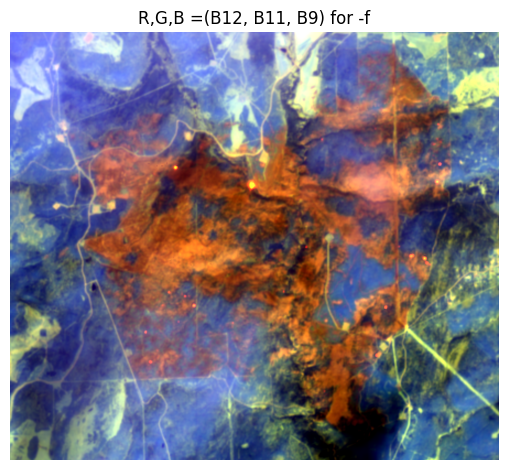

+r ../data/ubc/G80223_20230513.bin


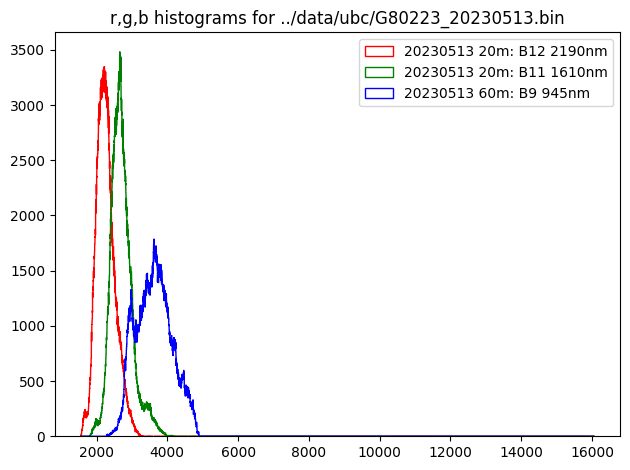

888 777 3
+r ../data/ubc/G80223_20230513.bin
(689976,)


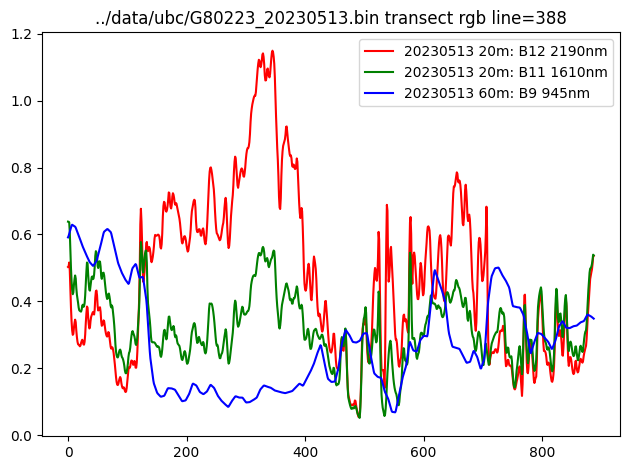

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


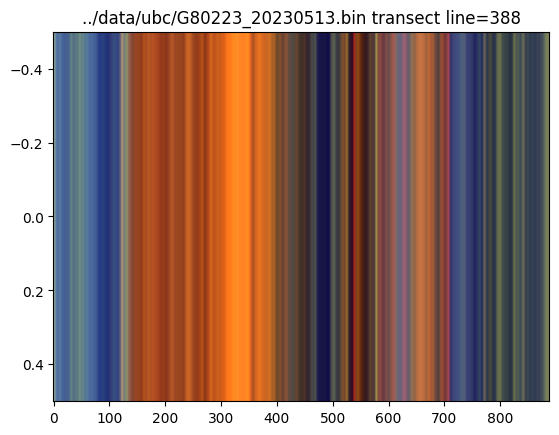

In [46]:
from raster_histogram import raster_transect; 
from raster_histogram import raster_histogram;
plot("../data/ubc/G80223_20230513.bin", True)
raster_histogram("../data/ubc/G80223_20230513.bin", [0, 1, 2])
raster_transect("../data/ubc/G80223_20230513.bin", [0, 1, 2], 388, True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


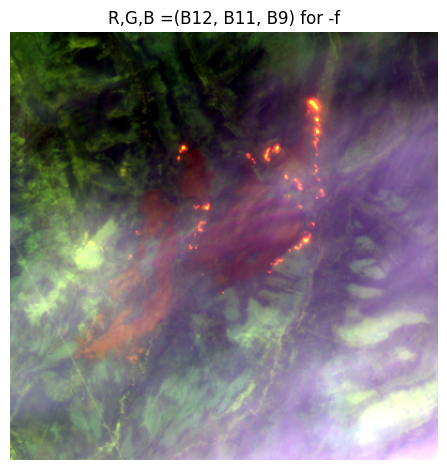

+r ../data/ubc/G90292_20230514.bin


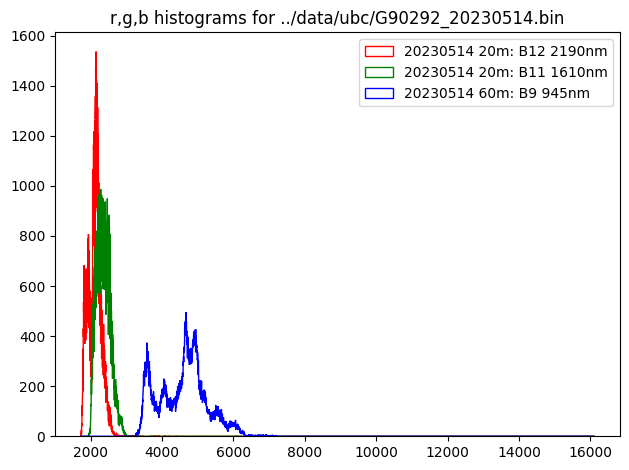

400 400 3
+r ../data/ubc/G90292_20230514.bin
(160000,)


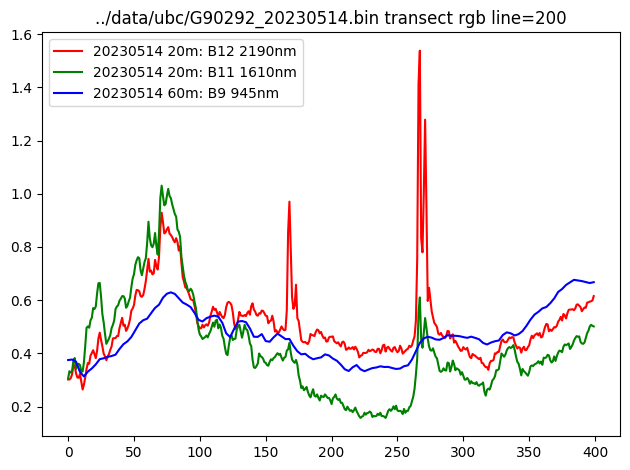

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


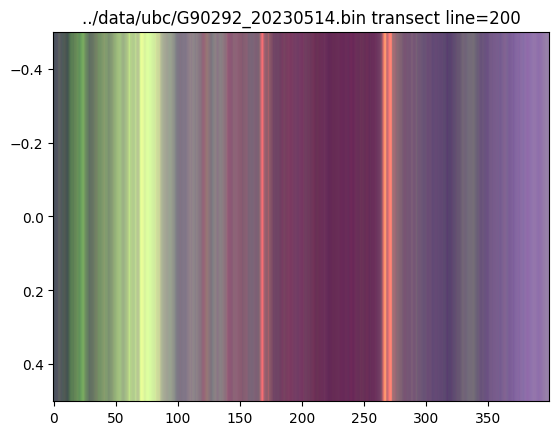

In [47]:
from raster_histogram import raster_histogram;
plot("../data/ubc/G90292_20230514.bin", True)
raster_histogram("../data/ubc/G90292_20230514.bin", [0, 1, 2])
from raster_histogram import raster_transect; 
raster_transect("../data/ubc/G90292_20230514.bin", [0, 1, 2], 200, True)

In [43]:
#color transect / horizontal